# Homework 03

For this exercise use the first 500-900 rows of the titanic data depending on your computer strength, but the whole data should not be a problem either.

Keep only Age, Gender, Passenger class and Survived columns. If a parameter is unknown, use the average value.

Create a synthetic dataset with 500-1000 datapoints with same allowed values as the real data (e.g for class 1,2,3, for age 0-80, etc.)

Perform a random forest analysis and get a distance matrix, try to find clusters. You can use any cluster detection algorithm (e.g. k-means, hierarchical clustering). Go through the clusters and check the average values for all parameters.

I have gotten clusters with e.g. 3., 1., 29.85786257, 0., meaning the male on third class did not survive, or 2.59036145, 0.1325301, 29.88719464, 0.74698795, meaning that females had 3/4 chance of survival. (You may get different cluster centers but they should be meaningful.)

Note that age is the average age in both cases, so I could have gotten the same results without the age parameter. You may try it for extra points!

In [66]:
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
import pandas as pd
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans

In [67]:
pdata = pd.read_csv('titanic.csv', delimiter = ';')
pdata

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [68]:
N = 500

pdata = pdata.head(500)

In [69]:
pdata = pdata.drop(columns = ['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'])

In [70]:
pdata['Age'].fillna(pdata['Age'].mean(), inplace = True)
pdata['Sex'] = (pdata['Sex'] == 'female').astype(int)

pdata

,Survived,Pclass,Sex,Age
0,0,3,0,22.000000
1,1,1,1,38.000000
2,1,3,1,26.000000
3,1,1,1,35.000000
4,0,3,0,35.000000
...,...,...,...,...
495,0,3,0,29.204774
496,1,1,1,54.000000
497,0,3,0,29.204774
498,0,1,1,25.000000


In [94]:
NY = 1000

y = np.random.randint(low = [0, 1, 0, 0], high = [2, 4, 2, 81], size = (NY, 4))
y

array([[ 0,  1,  1, 19],
       [ 1,  2,  0, 58],
       [ 1,  2,  1, 25],
       ...,
       [ 1,  1,  0, 29],
       [ 1,  1,  0, 13],
       [ 1,  2,  0, 26]])

In [95]:
z = np.zeros((NY + N, 4), dtype = float)
t = np.zeros(NY + N, dtype = int)

z[:N] = pdata.values
z[N:] = y
t[N:] = 1

In [96]:
clf = tree.DecisionTreeClassifier()
dist = np.zeros((N, N), dtype = float)

for k in range(100):
  mask = np.random.random(len(z)) < 0.30
  features = z[mask]
  target = t[mask]
  clf = clf.fit(features, target)
  res = clf.apply(pdata.values)
  
  for i in range(N):
    for j in range(i + 1, N):
      if res[i] == res[j]: 
        dist[i][j] += 1
        dist[j][i] += 1

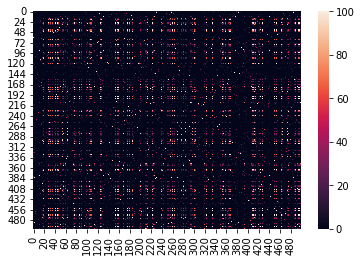

In [97]:
import seaborn as SNS

SNS.heatmap(dist)

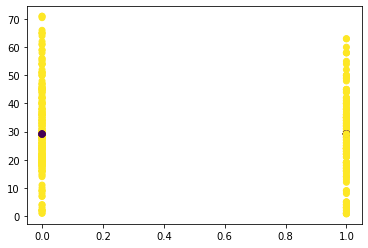

In [103]:
N_Clusters = 2

kmeans = KMeans(n_clusters = N_Clusters).fit(dist)
plt.scatter(pdata.to_numpy()[:,0], pdata.to_numpy()[:,3], c = kmeans.labels_)

In [101]:
for i in range(N_Clusters):
  print('Cluster', i)
  mask = kmeans.labels_ == i
  print(pdata[mask].mean())
  print()

Cluster 0
Survived     0.404306
Pclass       2.193780
Sex          0.375598
Age         29.206733
dtype: float64

Cluster 1
Survived     0.292683
Pclass       3.000000
Sex          0.341463
Age         29.194785
dtype: float64



From these results, after applying the k-means clustering to try to find clusters of points, we found out that males from the 3rd class have a 29% chance of survival, or that people from the 2nd class had a higher chance of survival than the ones on the 3rd class.

The Age parameter, as there were a lot of people with NaN in the age, it is very biased to cluster with the average age value. I will now try to find clusters without it:

In [105]:
new_data = pdata.drop(columns = 'Age')

NY2 = 1000

y2 = np.random.randint(low = [0, 1, 0], high = [2, 4, 2], size = (NY, 3))

z2 = np.zeros((NY + N, 3), dtype = float)
t2 = np.zeros(NY + N, dtype = int)

z2[:N] = new_data.values
z2[N:] = y2
t2[N:] = 1

In [106]:
clf = tree.DecisionTreeClassifier()
dist = np.zeros((N, N), dtype = float)

for k in range(100):
  mask = np.random.random(len(z2)) < 0.30
  features = z2[mask]
  target = t2[mask]
  clf = clf.fit(features, target)
  res = clf.apply(new_data.values)
  
  for i in range(N):
    for j in range(i + 1, N):
      if res[i] == res[j]: 
        dist[i][j] += 1
        dist[j][i] += 1

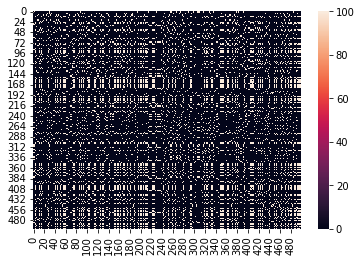

In [108]:
SNS.heatmap(dist)

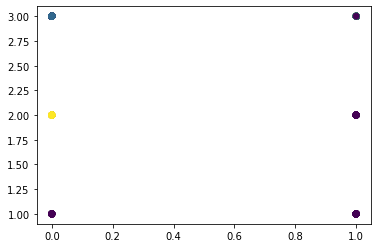

In [128]:
N_Clusters = 4

kmeans = KMeans(n_clusters = N_Clusters).fit(dist)
plt.scatter(new_data.to_numpy()[:,0], new_data.to_numpy()[:,1], c = kmeans.labels_)

In [129]:
for i in range(N_Clusters):
  print('Cluster', i)
  mask = kmeans.labels_ == i
  print(new_data[mask].mean())
  print()

Cluster 0
Survived    0.604255
Pclass      1.787234
Sex         0.570213
dtype: float64

Cluster 1
Survived    0.0
Pclass      3.0
Sex         0.0
dtype: float64

Cluster 2
Survived    1.0
Pclass      3.0
Sex         1.0
dtype: float64

Cluster 3
Survived    0.0
Pclass      2.0
Sex         0.0
dtype: float64



Here we can see that the KMeans algorithm found some interesting clusters:
- The males from the 2nd and 3rd class that did not survive
- The females from the 3rd class all survived